# Predicting Diabetes Using Naive Bayes

### Objective
- Apply Naive Bayes for binary classification.
- Practice data exploration and preprocessing.
- Evaluate model performance using appropriate metrics.
- Understand and interpret the log probabilities used in Naive Bayes.

### Dataset
This lab uses the Pima Indians Diabetes Dataset from the UCI Machine Learning Repository. It contains 8 features based on medical information, with a binary target indicating the presence of diabetes (1) or absence (0).

### Features
`Pregnancies`: Number of times pregnant
`Glucose`: Plasma glucose concentration
`BloodPressure`: Diastolic blood pressure (mm Hg)
`SkinThickness`: Triceps skinfold thickness (mm)
`Insulin`: 2-Hour serum insulin (mu U/ml)
`BMI`: Body mass index (weight in kg/(height in m)^2)
`DiabetesPedigreeFunction`: Diabetes pedigree function (a function based on family history)
`Age`: Age (years)
`Outcome`: Class variable (1 if patient has diabetes, 0 otherwise)

### Import packages

In [1]:
# Import the necessary libraries for data manipulation, model training, and evaluation.
# your code here

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and Exploration

In [ ]:
# Load the Pima Indiands Diabetes Dataset in the folder ../data and preview the data
# Display summary statistics
# your code here
data = pd.read_csv('C:/Users/isabe/OneDrive/Документы/ironhack/LEaRNGIT/lab 27/lab-naive-bayes/data/pima_diabetes.csv')

print(data.head())

print(data.describe())

print(data.isnull().sum())

print(data.info())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

### Data Cleaning

1. *Handling Missing Values*: Replace 0 values in Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns with their respective median values.
2. *Split Data*: Separate the feature columns (X) and target (y), and then split into training and test sets with an 80-20 split.

In [ ]:
# your code here
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace:
    data[column] = data[column].replace(0, data[column].median())

print("\nSummary Statistics after replacing 0 values:")
print(data[columns_to_replace].describe())

X = data.drop(columns=['Outcome'])  
y = data['Outcome']  

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nSize of Training Set: {X_train.shape[0]} samples")
print(f"Size of Testing Set: {X_test.shape[0]} samples")



Summary Statistics after replacing 0 values:
          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      27.334635   94.652344   32.450911
std     30.438286      12.096642       9.229014  105.547598    6.875366
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      23.000000   30.500000   27.500000
50%    117.000000      72.000000      23.000000   31.250000   32.000000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000

Size of Training Set: 614 samples
Size of Testing Set: 154 samples


### Train a Naïve Bayes Classifier

Since the features are continuous, we need to use the `GaussianNB` model instead of the ones we used so far for categorical variables

In [ ]:
# your code here
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154


Confusion Matrix:
[[78 21]
 [17 38]]


### Model Evaluation

Evaluate the model's accuracy, precision and recall. Analyse the confusion matrix.
Give the setting of the problem, which metrics would you privilege?

In [ ]:
# your code here
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test, y_pred).ravel()

print("\nConfusion Matrix Details:")
print(f"True Negatives: {true_negatives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"True Positives: {true_positives}")


print("\nIn this case, recall is crucial to minimize false negatives.")



Accuracy: 0.75
Precision: 0.64
Recall: 0.69
F1-Score: 0.67

Confusion Matrix Details:
True Negatives: 78
False Positives: 21
False Negatives: 17
True Positives: 38

In this case, recall is crucial to minimize false negatives.


### Exploring Log Probabilities in Naïve Bayes

Naive Bayes calculates log probabilities (logprobs) for each class to make predictions. Let's use `predict_log_proba` to calculate the log probabilities for each class (diabetes vs. no diabetes) for a few samples in the test set.

Question: For a given instance in the test set, calculate the log probabilities for each class (diabetes vs. no diabetes) and interpret the values. How does Naive Bayes decide the predicted class based on these log probabilities?

In [ ]:
log_probs = model.predict_log_proba(X_sample)

for i, index in enumerate(sample_indices):
    print(f"Sample {index} - Log Probabilities:")
    print(f"No Diabetes (0): {log_probs[i][0]:.4f}, Diabetes (1): {log_probs[i][1]:.4f}")
    print(f"Predicted Class: {model.predict(X_sample.iloc[[i]])[0]}")
    print()


Sample 0 - Log Probabilities:
No Diabetes (0): -0.2415, Diabetes (1): -1.5391
Predicted Class: 0

Sample 1 - Log Probabilities:
No Diabetes (0): -0.0728, Diabetes (1): -2.6562
Predicted Class: 0

Sample 12 - Log Probabilities:
No Diabetes (0): -0.9818, Diabetes (1): -0.4694
Predicted Class: 1



- Interpretation of Log Probabilities: Log probabilities represent the logarithm of the probability for each class. A higher log probability (closer to zero, since log values are negative) indicates a higher likelihood for that class.
- Decision-Making: The model predicts the class with the highest log probability. If the log probability for Diabetes (1) is higher (closer to zero) than for No Diabetes (0), the model will predict Diabetes (1).

Convert log probabilities back to regular probabilities using np.exp(log_probs) to see how log transformations aid computation without changing predictions.

In [ ]:
import numpy as np

sample_indices = [0, 1, 12]  
X_sample = X_test.iloc[sample_indices]

log_probs = model.predict_log_proba(X_sample)

probs = np.exp(log_probs)

for i, index in enumerate(sample_indices):
    print(f"Sample {index} - Log Probabilities:")
    print(f"No Diabetes (0): {log_probs[i][0]:.4f}, Diabetes (1): {log_probs[i][1]:.4f}")
    print(f"Converted Probabilities:")
    print(f"No Diabetes (0): {probs[i][0]:.4f}, Diabetes (1): {probs[i][1]:.4f}")
    
    input_with_features = X_sample.iloc[[i]]
    print(f"Predicted Class: {model.predict(input_with_features)[0]}")
    print()




Sample 0 - Log Probabilities:
No Diabetes (0): -0.2415, Diabetes (1): -1.5391
Converted Probabilities:
No Diabetes (0): 0.7854, Diabetes (1): 0.2146
Predicted Class: 0

Sample 1 - Log Probabilities:
No Diabetes (0): -0.0728, Diabetes (1): -2.6562
Converted Probabilities:
No Diabetes (0): 0.9298, Diabetes (1): 0.0702
Predicted Class: 0

Sample 12 - Log Probabilities:
No Diabetes (0): -0.9818, Diabetes (1): -0.4694
Converted Probabilities:
No Diabetes (0): 0.3746, Diabetes (1): 0.6254
Predicted Class: 1



Change your decision treshold so that either class 1 or 0 becomes more frequent in order to optimize your preferred metric (precision or recall) for this problem. Try multiple tresholds until you are satisfied with your choice.

In [ ]:
from sklearn.metrics import confusion_matrix

threshold = 0.5 


log_probs = model.predict_log_proba(X_test)

probabilities = []
for i, index in enumerate(X_test.index):
    no_diabetes_prob = np.exp(log_probs[i][0])
    diabetes_prob = np.exp(log_probs[i][1])
    
    prediction = 0 if no_diabetes_prob >= threshold else 1
    
    probabilities.append({
        'index': index,
        'no_diab_prob': no_diabetes_prob,
        'diab_prob': diabetes_prob,
        'prediction': prediction
    })

probabilities = pd.DataFrame(probabilities)

print(probabilities.head())

   index  no_diab_prob  diab_prob  prediction
0    668      0.785426   0.214574           0
1    324      0.929784   0.070216           0
2    624      0.981480   0.018520           0
3    690      0.848221   0.151779           0
4    473      0.451266   0.548734           1


In [ ]:
from sklearn.metrics import confusion_matrix

threshold = 0.5 


log_probs = model.predict_log_proba(X_test)

probabilities = []
for i, index in enumerate(X_test.index):
    no_diabetes_prob = np.exp(log_probs[i][0])
    diabetes_prob = np.exp(log_probs[i][1])
    
    prediction = 0 if no_diabetes_prob >= threshold else 1
    
    probabilities.append({
        'index': index,
        'no_diab_prob': no_diabetes_prob,
        'diab_prob': diabetes_prob,
        'prediction': prediction
    })

probabilities = pd.DataFrame(probabilities)

print(probabilities.head())

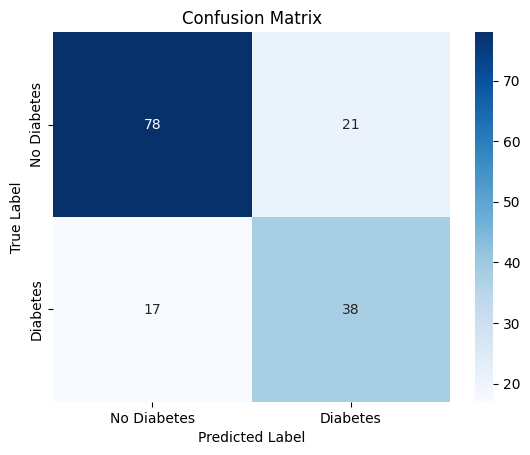

In [ ]:
y_pred_adjusted = probabilities['prediction']
cm = confusion_matrix(y_test, y_pred_adjusted)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

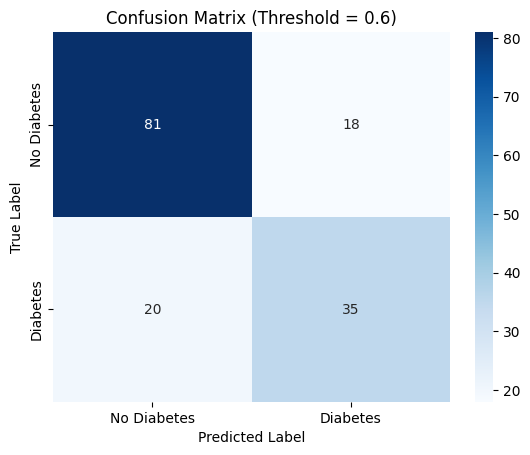

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

threshold = 0.6  # Change this to test different thresholds

probabilities['prediction'] = probabilities['diab_prob'].apply(lambda x: 1 if x >= threshold else 0)

cm = confusion_matrix(y_test, probabilities['prediction'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.show()

